## Применение ансамблевых моделей

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets

iris = datasets.load_iris()

Давайте посмотрим, как эти характеристики распределяются в разных классах. Построим
pairplot с помощью библиотеки seaborn.

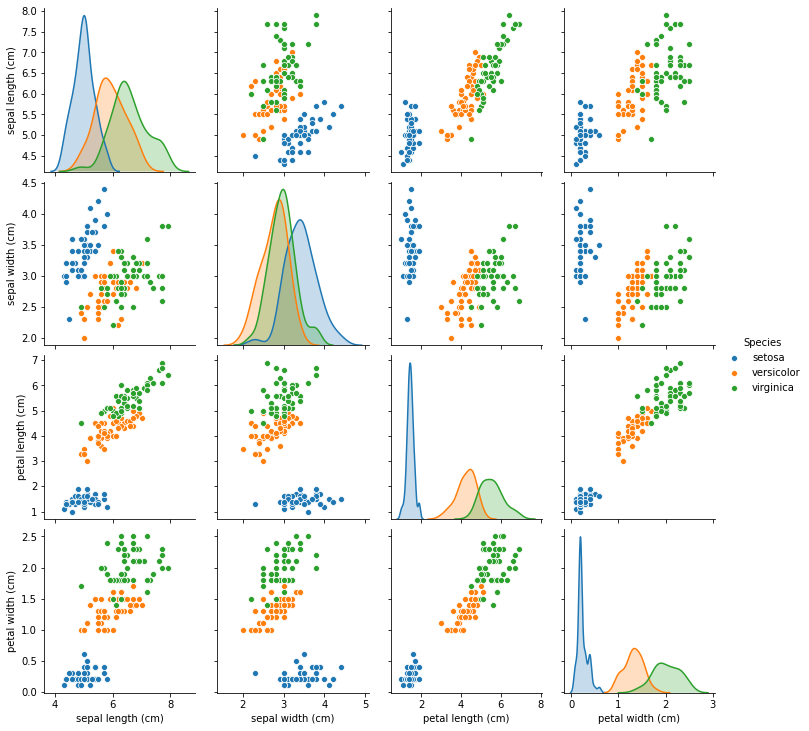

In [3]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Species'] = np.array([iris.target_names[cls] for cls in iris.target])
sns.pairplot(iris_df, hue='Species')

И здесь мы видим, что у нас синий класс, то есть setosa, линейно разделим. Мы можем использовать даже какую-то линейную модель, для того чтобы определить, что наш цветок принадлежит
именно к этому классу. Однако зеленый и красный класс гораздо более сильно похожи друг на
друга, поэтому здесь уже нужно строить какую-то нелинейную зависимость, и строить более
сложную модель, например, модель основанную на решающих деревьях. Именно это мы и будем
делать.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [8]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=4)

x_train, x_test, y_train, y_test = train_test_split(
iris.data, iris.target,
test_size=0.3, stratify=iris.target, random_state=42
)

rf_model = random_forest.fit(x_train, y_train)

In [9]:
predictions = rf_model.predict(x_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))

Accuracy: 0.89


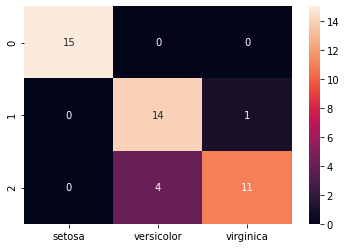

In [10]:
confusion_scores = confusion_matrix(y_test, predictions)
confusion_df = pd.DataFrame(confusion_scores, columns=iris.target_names)
sns.heatmap(confusion_df, annot=True)

In [15]:
feature_importance = list(zip(iris.feature_names, rf_model.feature_importances_))
feature_importance_df = pd.DataFrame(feature_importance, columns=['Feature', 'RF Importance'])
feature_importance_df

,Feature,RF Importance
0,sepal length (cm),0.135124
1,sepal width (cm),0.020989
2,petal length (cm),0.444023
3,petal width (cm),0.399864


In [16]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 4,
 'verbose': 0,
 'warm_start': False}

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model = gradient_boosting.fit(x_train, y_train)

print('Accuracy: {:.2f}'.format(gb_model.score(x_test, y_test)))

Accuracy: 0.93


In [18]:
feature_importance_df['GB Importance'] = gb_model.feature_importances_
feature_importance_df

,Feature,RF Importance,GB Importance
0,sepal length (cm),0.135124,0.009338
1,sepal width (cm),0.020989,0.011578
2,petal length (cm),0.444023,0.352427
3,petal width (cm),0.399864,0.626657


In [19]:
gb_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}